In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('countries-table_11.csv')
df

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,230,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,111.3700,500,11452,5138,4938,4390,4386,4301,3781
230,Falkland Islands,231,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,0.8066,238,2240,3080,3187,3780,3791,3869,3779
231,Niue,232,261.00,261.00,NU,NIU,0.0000,0.0005,NaN,7.4138,19.2017,570,3637,2074,1812,1934,1935,1948,2096
232,Tokelau,233,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,490.2870,772,1647,1666,1367,1871,1893,2046,2430


In [26]:
def separate_data_types(df):
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<225:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=separate_data_types(df)

from tabulate import tabulate
print(tabulate({"categorical":categorical,
                 "continuous":continuous},
                 headers=["categorical", "continuous"]))


categorical      continuous
---------------  ------------
area             country
landAreaKm       rank
netChange        cca2
growthRate       cca3
worldPercentage  density
                 densityMi
                 place
                 pop1980
                 pop2000
                 pop2010
                 pop2022
                 pop2023
                 pop2030
                 pop2050


In [3]:
df.isnull().sum()

country            0
rank               0
area               0
landAreaKm         0
cca2               1
cca3               0
netChange          8
growthRate         0
worldPercentage    6
density            0
densityMi          0
place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
dtype: int64

In [6]:
df.worldPercentage.value_counts()

0.0000    51
0.0001    18
0.0003    11
0.0007    10
0.0002     9
          ..
0.0038     1
0.0107     1
0.0034     1
0.0030     1
0.1785     1
Name: worldPercentage, Length: 73, dtype: int64

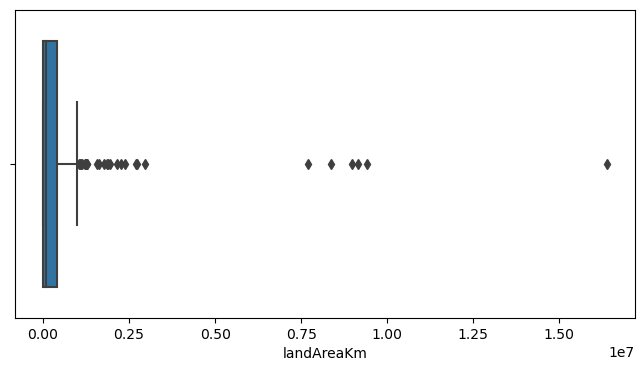

In [15]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.landAreaKm);

In [16]:
q1=df['landAreaKm'].describe()['25%']
q3=df['landAreaKm'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['landAreaKm']=np.where(df['landAreaKm']>upper_bound, upper_bound, df['landAreaKm'])

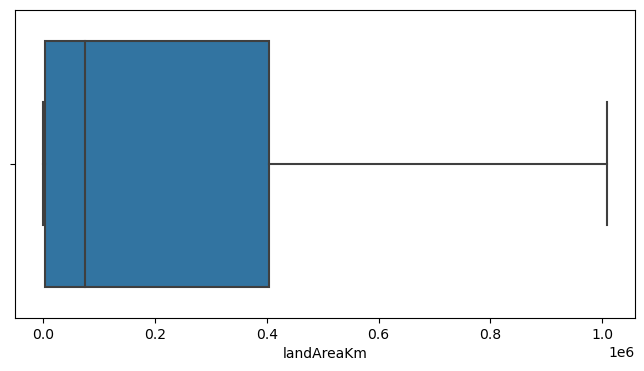

In [17]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.landAreaKm);

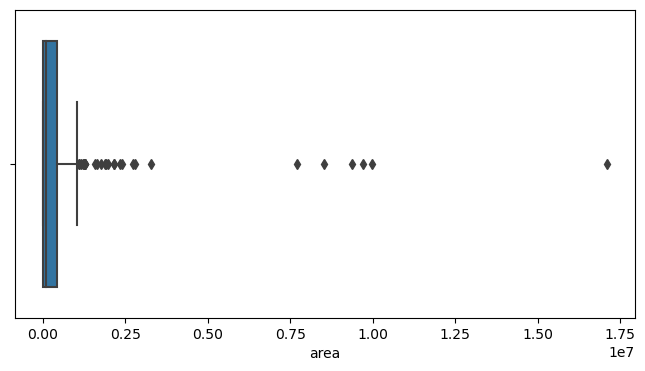

In [18]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.area);

In [19]:
q1=df['area'].describe()['25%']
q3=df['area'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['area']=np.where(df['area']>upper_bound, upper_bound, df['area'])

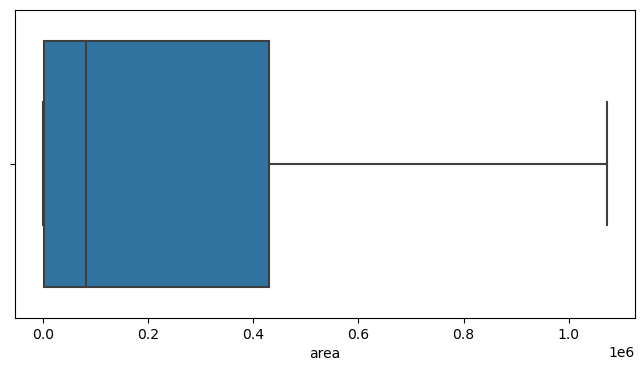

In [20]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.area);

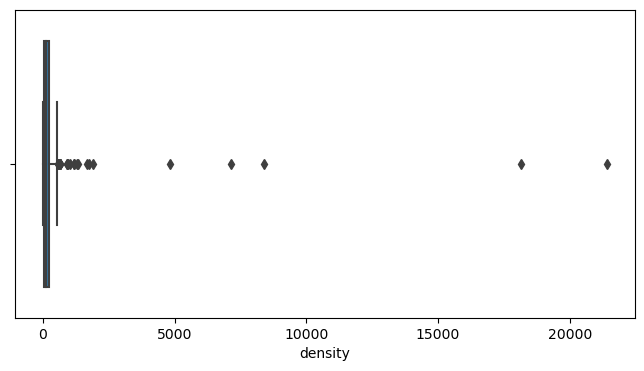

In [27]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.density);

In [28]:
q1=df['density'].describe()['25%']
q3=df['density'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['density']=np.where(df['density']>upper_bound, upper_bound, df['density'])

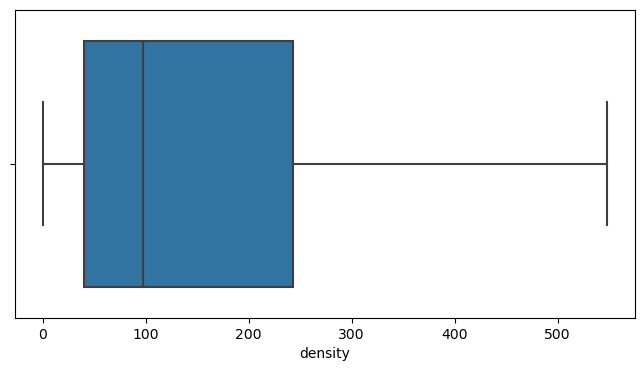

In [29]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.density);

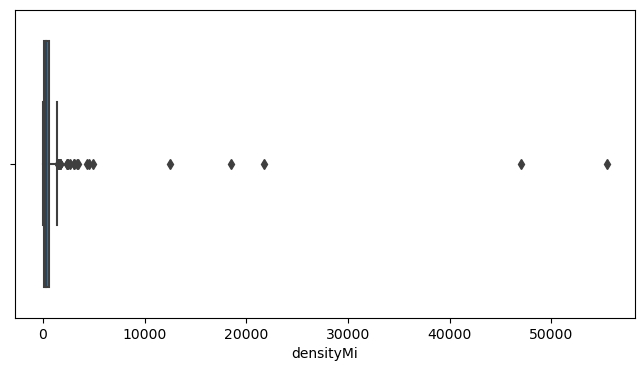

In [30]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.densityMi);

In [31]:
q1=df['densityMi'].describe()['25%']
q3=df['densityMi'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['densityMi']=np.where(df['densityMi']>upper_bound, upper_bound, df['densityMi'])

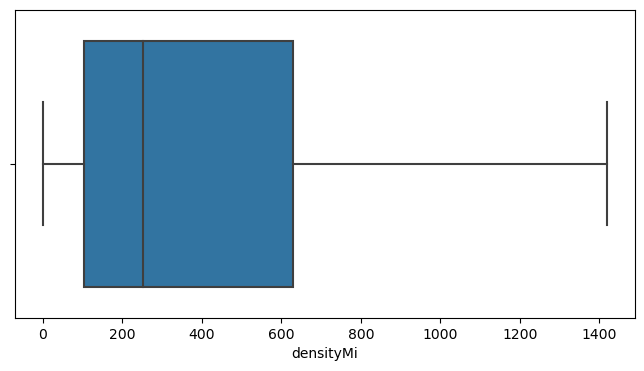

In [32]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.densityMi);

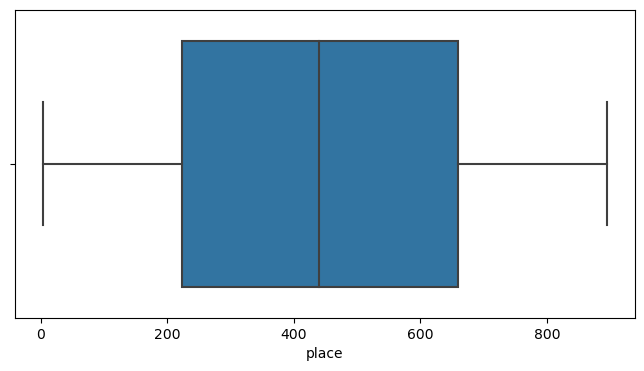

In [33]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.place);

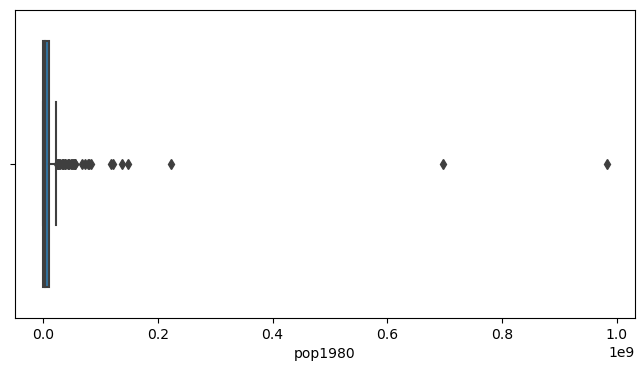

In [34]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop1980);

In [35]:
q1=df['pop1980'].describe()['25%']
q3=df['pop1980'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop1980']=np.where(df['pop1980']>upper_bound, upper_bound, df['pop1980'])

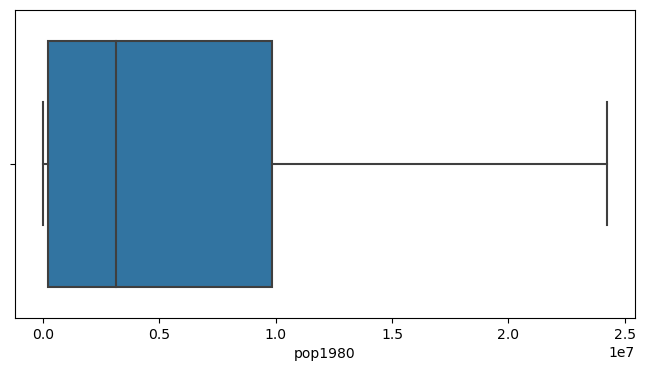

In [36]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop1980);

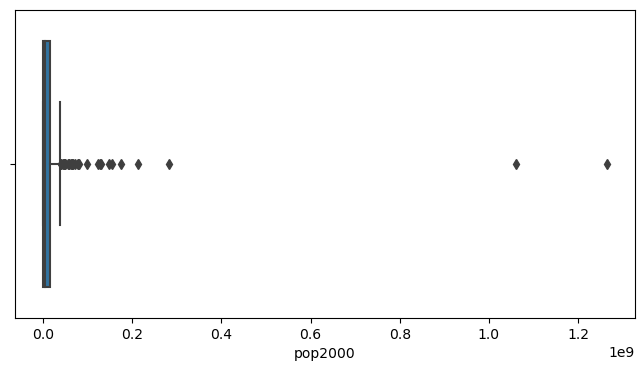

In [37]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2000);

In [38]:
q1=df['pop2000'].describe()['25%']
q3=df['pop2000'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop2000']=np.where(df['pop2000']>upper_bound, upper_bound, df['pop2000'])

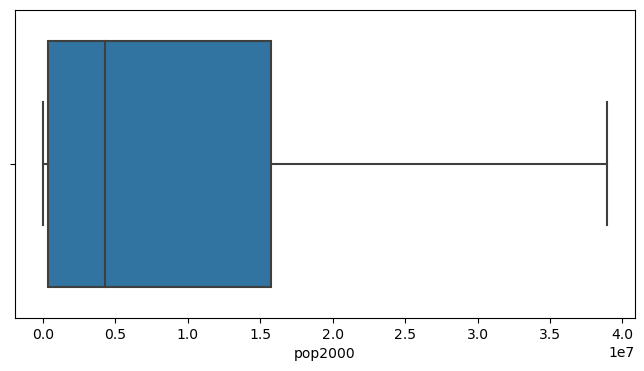

In [39]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2000);

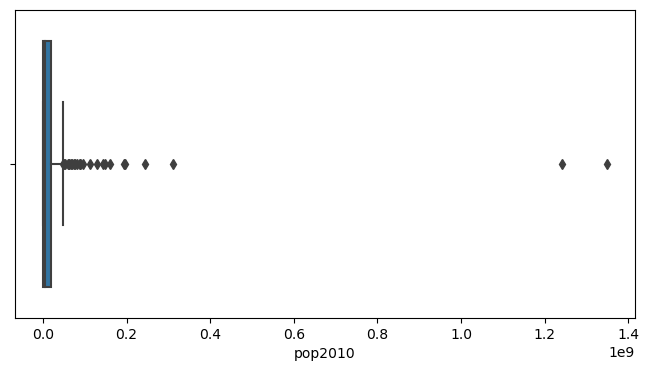

In [40]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2010);

In [41]:
q1=df['pop2010'].describe()['25%']
q3=df['pop2010'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop2010']=np.where(df['pop2010']>upper_bound, upper_bound, df['pop2010'])

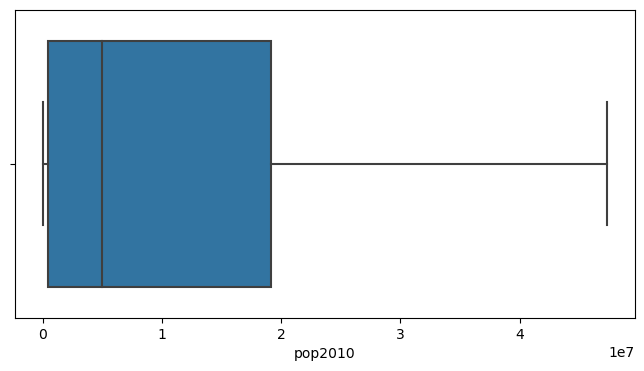

In [42]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2010);

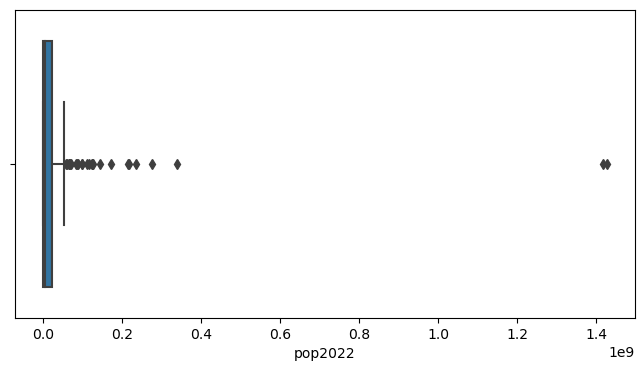

In [43]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2022);

In [44]:
q1=df['pop2022'].describe()['25%']
q3=df['pop2022'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop2022']=np.where(df['pop2022']>upper_bound, upper_bound, df['pop2022'])

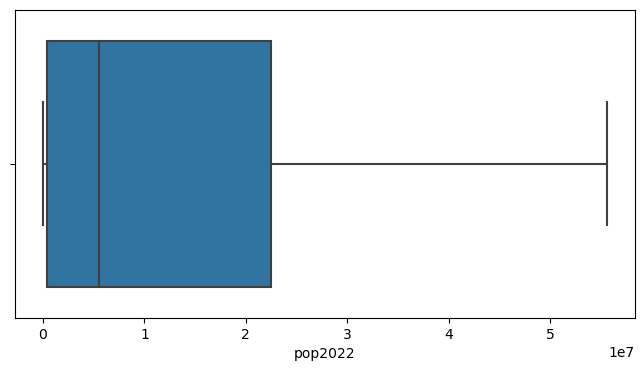

In [45]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2022);

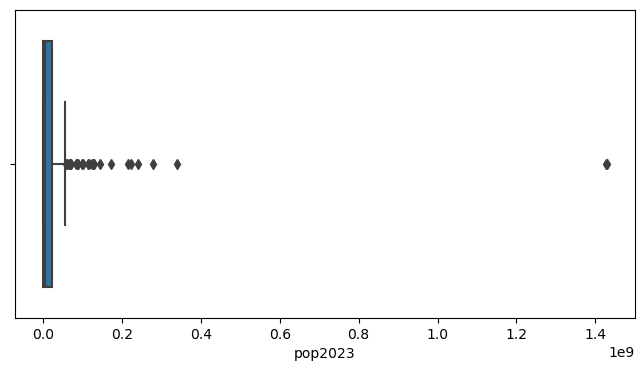

In [46]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2023);

In [47]:
q1=df['pop2023'].describe()['25%']
q3=df['pop2023'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop2023']=np.where(df['pop2023']>upper_bound, upper_bound, df['pop2023'])

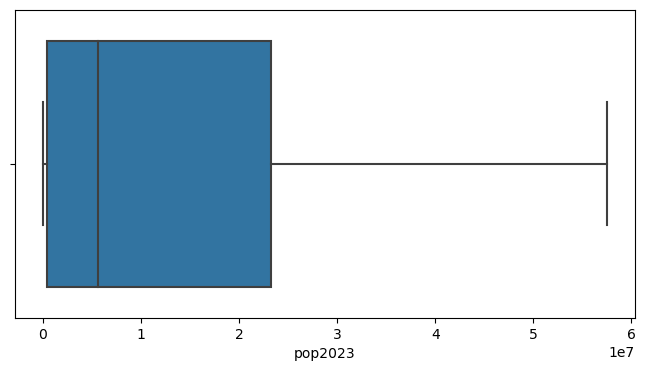

In [48]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2023);

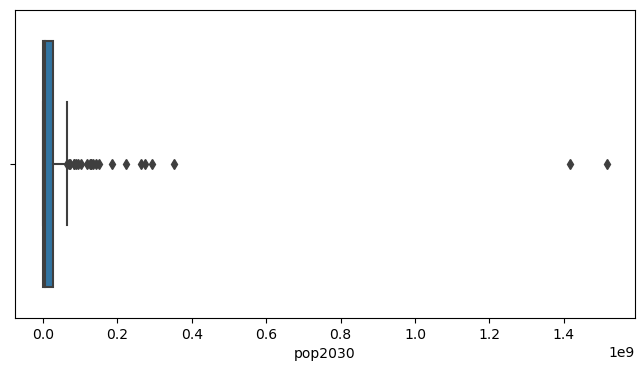

In [49]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2030);

In [50]:
q1=df['pop2030'].describe()['25%']
q3=df['pop2030'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop2030']=np.where(df['pop2030']>upper_bound, upper_bound, df['pop2030'])

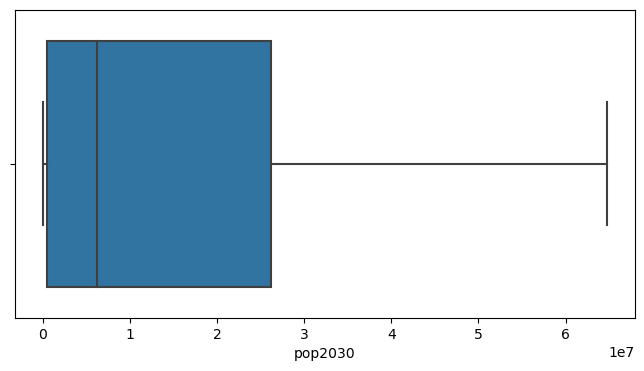

In [51]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2030);

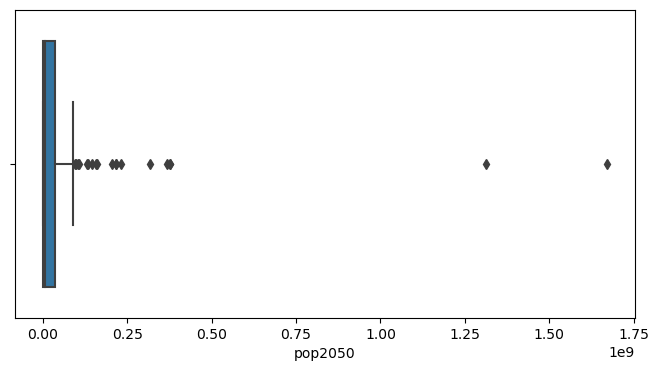

In [52]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2050);

In [53]:
q1=df['pop2050'].describe()['25%']
q3=df['pop2050'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['pop2050']=np.where(df['pop2050']>upper_bound, upper_bound, df['pop2050'])

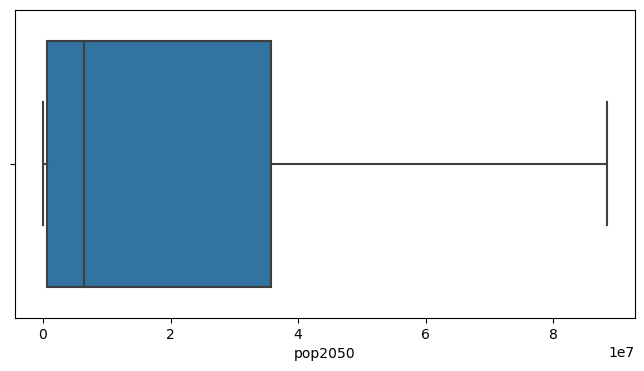

In [54]:
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(df.pop2050);

In [58]:
df.netChange.isnull().sum()

8

In [57]:
df.netChange.value_counts()

 0.0000    46
 0.0200    32
 0.0001    11
 0.0002    11
 0.0003     6
           ..
-0.0113     1
 0.0058     1
 0.0020     1
 0.0125     1
 0.0072     1
Name: netChange, Length: 88, dtype: int64

In [59]:
df['netChange']=df['netChange'].fillna(df['netChange'].mode()[0])

In [60]:
df.netChange.isnull().sum()

0

In [61]:
df.worldPercentage.isnull().sum()

6

In [67]:
df.worldPercentage.value_counts()

0.0000    57
0.0001    18
0.0003    11
0.0007    10
0.0002     9
          ..
0.0038     1
0.0107     1
0.0034     1
0.0030     1
0.1785     1
Name: worldPercentage, Length: 73, dtype: int64

In [62]:
df['worldPercentage']=df['worldPercentage'].fillna(df['worldPercentage'].mode()[0])

In [63]:
df.worldPercentage.isnull().sum()

0

In [64]:
df.cca2.isnull().sum()

1

In [66]:
df.cca2.value_counts()

IN    1
FJ    1
MK    1
LV    1
GQ    1
     ..
JO    1
DO    1
CU    1
SS    1
VA    1
Name: cca2, Length: 233, dtype: int64

In [68]:
df['cca2']=df['cca2'].fillna(df['cca2'].mode()[0])

In [69]:
df.cca2.isnull().sum()

0

In [70]:
df.to_csv('Word_Population_data.csv')